In [1]:
import sys
import numpy as np
import matplotlib as mpl
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from scipy.fft import fft
from scipy import interpolate

%config InlineBackend.figure_formats = ['svg']
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams.update({'mathtext.fontset': 'cm'})
mpl.rcParams.update({'axes.titlesize': 24})
mpl.rcParams.update({'axes.labelsize': 20})
mpl.rcParams.update({'axes.labelpad': 12})
mpl.rcParams.update({'axes.linewidth': 0.5})
mpl.rcParams.update({'xtick.labelsize': 14})
mpl.rcParams.update({'ytick.labelsize': 14})
mpl.rcParams.update({'font.size': 14})

marker_list = ['o','*','^','s','D']
color_list = ['k','r','b','g','c','m']

## Read the drag data from the CSV file

In [2]:
fig = plt.figure()
data = pd.read_csv('./all_data.csv')
data

,Unnamed: 0,Re,LbyD,theta,Cdp,Cdv,Cd,Clp,Clv,Cl,Cdp_ref,Cdv_ref,Cd_ref,Clp_ref,Clv_ref,Cl_ref
0,0,20,2,0,0.896454,1.617765,2.514219,0.077186,-0.040163,0.037022,1.037404,1.764417,2.801821,0.116940,-0.006374,0.110566
1,1,20,2,180,0.471398,0.973118,1.444516,0.135049,0.096915,0.231963,1.037404,1.764417,2.801821,0.116940,-0.006374,0.110566
2,2,20,2,-180,0.471398,0.973118,1.444516,0.135049,0.096915,0.231963,1.037404,1.764417,2.801821,0.116940,-0.006374,0.110566
3,3,20,2,15,0.873545,1.585476,2.459022,-0.052711,-0.148335,-0.201046,1.037404,1.764417,2.801821,0.116940,-0.006374,0.110566
4,4,20,2,30,0.925547,1.651519,2.577066,-0.182637,-0.269620,-0.452257,1.037404,1.764417,2.801821,0.116940,-0.006374,0.110566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,70,100,16,-45,0.533192,0.588367,1.121559,0.044767,0.034363,0.079130,0.504753,0.568760,1.073513,-0.000074,0.000027,-0.000047
296,71,100,16,150,0.384625,0.493278,0.877904,-0.004441,0.046226,0.041785,0.504753,0.568760,1.073513,-0.000074,0.000027,-0.000047
297,72,100,16,-30,0.484730,0.555616,1.040346,0.008225,0.018266,0.026491,0.504753,0.568760,1.073513,-0.000074,0.000027,-0.000047
298,73,100,16,165,0.281434,0.361753,0.643187,-0.012698,0.050981,0.038283,0.504753,0.568760,1.073513,-0.000074,0.000027,-0.000047


0.9998327744215648


/tmp/ipykernel_682523/368021978.py:46: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  ax[0].stem(freq, 2./N*np.abs(X), 'b', markerfmt=" ", basefmt="-b")
/tmp/ipykernel_682523/368021978.py:49: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  ax[1].stem(freq, 180/np.pi*(alpha), 'b', markerfmt=" ", basefmt="-b")


<Figure size 640x480 with 0 Axes>

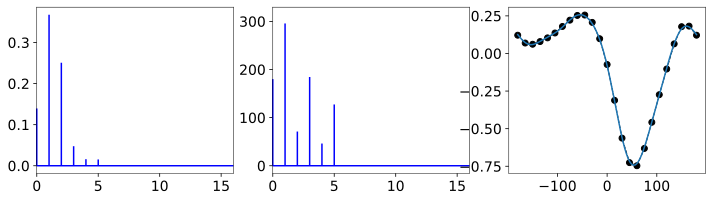

/tmp/ipykernel_682523/368021978.py:46: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  ax[0].stem(freq, 2./N*np.abs(X), 'b', markerfmt=" ", basefmt="-b")
/tmp/ipykernel_682523/368021978.py:49: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  ax[1].stem(freq, 180/np.pi*(alpha), 'b', markerfmt=" ", basefmt="-b")


0.9996648708184549


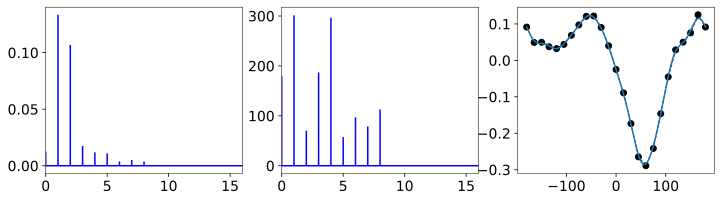

/tmp/ipykernel_682523/368021978.py:46: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  ax[0].stem(freq, 2./N*np.abs(X), 'b', markerfmt=" ", basefmt="-b")
/tmp/ipykernel_682523/368021978.py:49: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  ax[1].stem(freq, 180/np.pi*(alpha), 'b', markerfmt=" ", basefmt="-b")


0.9990034271916024


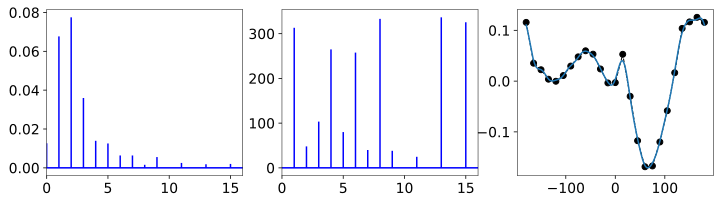

/tmp/ipykernel_682523/368021978.py:46: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  ax[0].stem(freq, 2./N*np.abs(X), 'b', markerfmt=" ", basefmt="-b")
/tmp/ipykernel_682523/368021978.py:49: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  ax[1].stem(freq, 180/np.pi*(alpha), 'b', markerfmt=" ", basefmt="-b")


0.9998691428091345


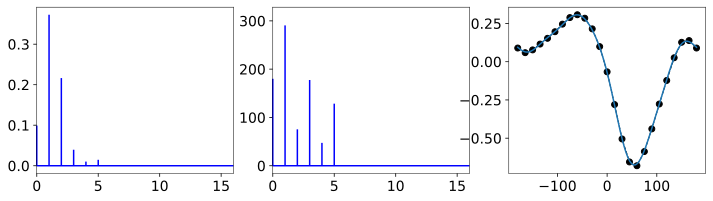

/tmp/ipykernel_682523/368021978.py:46: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  ax[0].stem(freq, 2./N*np.abs(X), 'b', markerfmt=" ", basefmt="-b")
/tmp/ipykernel_682523/368021978.py:49: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  ax[1].stem(freq, 180/np.pi*(alpha), 'b', markerfmt=" ", basefmt="-b")


0.999704326198305


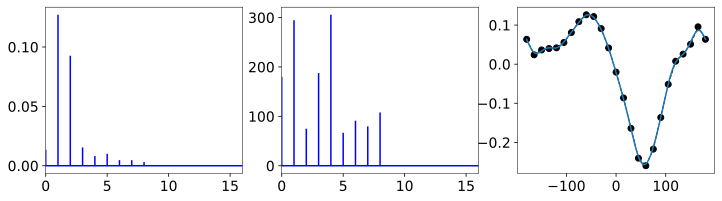

/tmp/ipykernel_682523/368021978.py:46: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  ax[0].stem(freq, 2./N*np.abs(X), 'b', markerfmt=" ", basefmt="-b")
/tmp/ipykernel_682523/368021978.py:49: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  ax[1].stem(freq, 180/np.pi*(alpha), 'b', markerfmt=" ", basefmt="-b")


0.9988181483127787


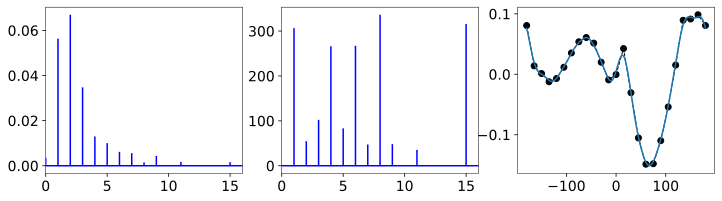

/tmp/ipykernel_682523/368021978.py:46: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  ax[0].stem(freq, 2./N*np.abs(X), 'b', markerfmt=" ", basefmt="-b")
/tmp/ipykernel_682523/368021978.py:49: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  ax[1].stem(freq, 180/np.pi*(alpha), 'b', markerfmt=" ", basefmt="-b")


0.9998878581966529


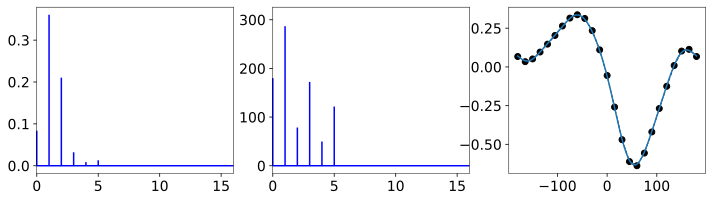

/tmp/ipykernel_682523/368021978.py:46: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  ax[0].stem(freq, 2./N*np.abs(X), 'b', markerfmt=" ", basefmt="-b")
/tmp/ipykernel_682523/368021978.py:49: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  ax[1].stem(freq, 180/np.pi*(alpha), 'b', markerfmt=" ", basefmt="-b")


0.999727974436136


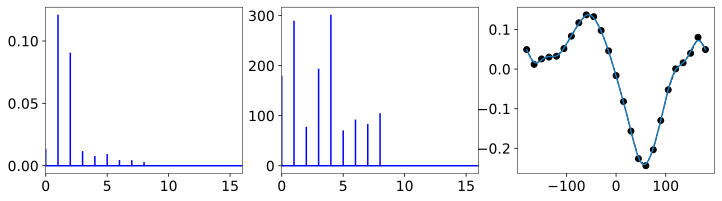

/tmp/ipykernel_682523/368021978.py:46: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  ax[0].stem(freq, 2./N*np.abs(X), 'b', markerfmt=" ", basefmt="-b")
/tmp/ipykernel_682523/368021978.py:49: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  ax[1].stem(freq, 180/np.pi*(alpha), 'b', markerfmt=" ", basefmt="-b")


0.9986573375989678


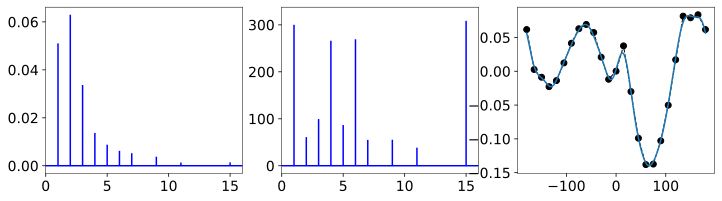

/tmp/ipykernel_682523/368021978.py:46: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  ax[0].stem(freq, 2./N*np.abs(X), 'b', markerfmt=" ", basefmt="-b")
/tmp/ipykernel_682523/368021978.py:49: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  ax[1].stem(freq, 180/np.pi*(alpha), 'b', markerfmt=" ", basefmt="-b")


0.9996345797073511


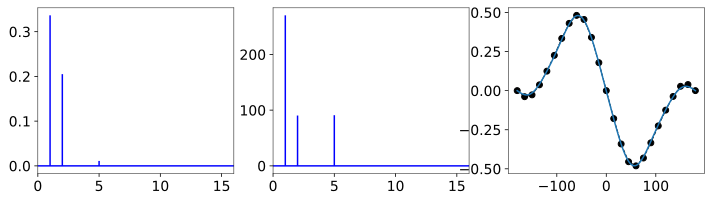

/tmp/ipykernel_682523/368021978.py:46: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  ax[0].stem(freq, 2./N*np.abs(X), 'b', markerfmt=" ", basefmt="-b")
/tmp/ipykernel_682523/368021978.py:49: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  ax[1].stem(freq, 180/np.pi*(alpha), 'b', markerfmt=" ", basefmt="-b")


0.9997537621079209


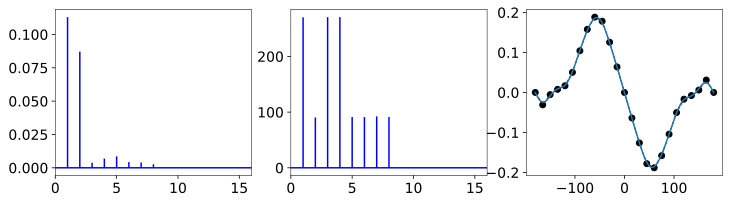

/tmp/ipykernel_682523/368021978.py:46: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  ax[0].stem(freq, 2./N*np.abs(X), 'b', markerfmt=" ", basefmt="-b")
/tmp/ipykernel_682523/368021978.py:49: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  ax[1].stem(freq, 180/np.pi*(alpha), 'b', markerfmt=" ", basefmt="-b")


0.9990316683144704


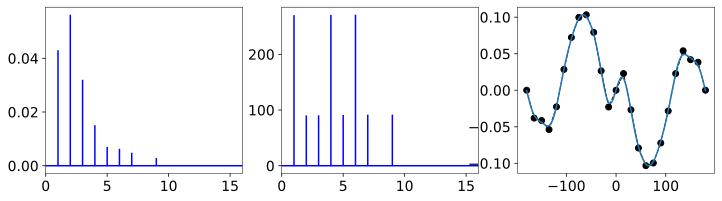

In [4]:
surf_coeff = []

Re_list = [20,50,100]
LbyD_list = [2,3,4,16]

# sampling rate
sr = 1000
n_terms = 15

for LbyD in LbyD_list:
    for Re in Re_list:

        data_tar = data[(data.LbyD == LbyD) & (data.Re == Re)]
        data_tar = data_tar.sort_values(by='theta')

        # Interpolation for high resolution
        x_fine = np.linspace(-180,180,sr)
        y_fine = np.zeros(sr)
        for j in np.arange(0,len(x_fine),1):
            f_int = interpolate.interp1d(data_tar.theta.to_numpy(), data_tar.Cl.to_numpy()-data_tar.Cl_ref.iloc[-1])
            y_fine[j] = f_int(x_fine[j])

        X = fft(y_fine)
        N = len(X)
        n = np.arange(N)
        T = N/sr
        freq = n/T 
        
        alpha = np.angle(X)
        
        # Frequency filter
        threshold = max(abs(X))/50
        for i in range(len(X)):
            if (abs(X[i]) < threshold):
                X[i] = 0
                alpha[i] = 0
        
        # Shifting the angles by pi
        
        for i in range(len(X)):
            if (alpha[i] < 0):
                alpha[i] = alpha[i] + 2.*np.pi
        
        # Plotting the data
        fig, ax = plt.subplots(1, 3, figsize=(12, 3))
        ax[0].stem(freq, 2./N*np.abs(X), 'b', markerfmt=" ", basefmt="-b")
        ax[0].set_xlim(0,n_terms+1)
        
        ax[1].stem(freq, 180/np.pi*(alpha), 'b', markerfmt=" ", basefmt="-b")
        ax[1].set_xlim(0,n_terms+1)

        def func_pred(x):
            value = 0
            for i in range(n_terms):
                freq = i
                scale = 2./N
                if (i == 0): 
                    scale = 1./N
                value = value + scale*np.abs(X[i]) * np.cos(freq * x + alpha[i])
            return value
        
        ax[2].plot(data_tar.theta.to_numpy(),data_tar.Cl.to_numpy()-data_tar.Cl_ref.iloc[-1],marker_list[0],color=color_list[0],markersize=6,linewidth=2)
        ax[2].plot(x_fine,y_fine,"--",color=color_list[0],markersize=6,linewidth=1)
        ax[2].plot(x_fine, func_pred(x_fine/360*2.*np.pi + np.pi))
        r2 = r2_score(y_fine, func_pred(x_fine/360*2.*np.pi + np.pi))
        print(r2)
        
        for i in range(n_terms):
            if (i == 0):
                surf_coeff.append([Re, LbyD, i, 1./N*np.abs(X[i]), alpha[i]*180/np.pi, r2])
            else:
                surf_coeff.append([Re, LbyD, i, 2./N*np.abs(X[i]), alpha[i]*180/np.pi, r2])

        plt.show()
        
df_surf = pd.DataFrame(surf_coeff,
                  columns = ['Re' , 'LbyD', 'freq' , 'A', 'theta', 'R2'])

## Show the coefficients stored in the pandas dataframe

In [6]:
LbyD2 = df_surf[(df_surf.LbyD==2)]
LbyD3 = df_surf[(df_surf.LbyD==3)]
LbyD4 = df_surf[(df_surf.LbyD==4)]
LbyD16 = df_surf[(df_surf.LbyD==16)]
df_surf

,Re,LbyD,freq,A,theta,R2
0,20,2,0,0.069703,180.000000,0.999833
1,20,2,1,0.367614,295.720047,0.999833
2,20,2,2,0.250759,71.055935,0.999833
3,20,2,3,0.047490,184.407343,0.999833
4,20,2,4,0.015895,46.191811,0.999833
...,...,...,...,...,...,...
175,100,16,10,0.000000,0.000000,0.999032
176,100,16,11,0.000000,0.000000,0.999032
177,100,16,12,0.000000,0.000000,0.999032
178,100,16,13,0.000000,0.000000,0.999032


## Comparison of prediction and actual values

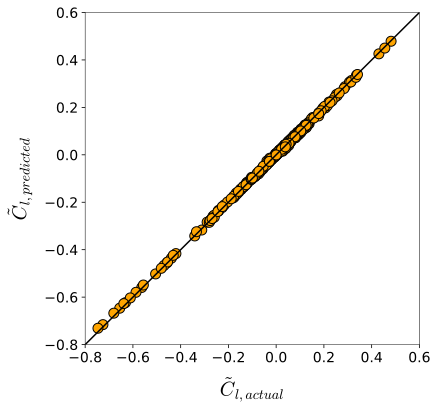

In [7]:
plt.figure(figsize=(6,6))

for LbyD in LbyD_list:
    for Re in Re_list:

        data_tar = data[(data.LbyD == LbyD) & (data.Re == Re)]
        data_tar = data_tar.sort_values(by='theta')

        df_surf_temp = df_surf[(df_surf.LbyD == LbyD) & (df_surf.Re == Re)]
        df_surf_temp = df_surf_temp.reset_index()

        def func_pred(x):
            value = 0
            for i in range(n_terms):
#                 print(i)
                freq = i
                value = value + df_surf_temp.A[i] * np.cos(freq * x + np.pi/180*df_surf_temp.theta[i])
            return value
            
        # Plotting the data
        plt.scatter(data_tar.Cl.to_numpy()-data_tar.Cl_ref.iloc[-1], func_pred(data_tar.theta/360*2.*np.pi + np.pi).to_numpy(), s=100, facecolors='orange', edgecolors='k')
        

plt.plot(np.linspace(-0.8,0.6,10), np.linspace(-0.8,0.6,10),color='k')
plt.xlabel(r"$\tilde{C}_{l,actual}$")
plt.ylabel(r"$\tilde{C}_{l,predicted}$")
plt.xlim(-0.8,0.6)
plt.ylim(-0.8,0.6)
plt.show()